*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


# Part 6: Inspecting and comparing embeddings

### Sentence Similarity

In [2]:
import numpy as np
import nltk
from numpy.linalg import norm

# Tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text.lower())


# ---------------------------------------------------------
# 1. Model Loading
# ---------------------------------------------------------
import pickle
from gensim.models import KeyedVectors


# 1. My PyTorch Skip-Gram
with open('word2vec_embeddings.pkl', 'rb') as f:
    my_model_data = pickle.load(f)

# 2. Gensim
with open('word2vec_gensim_embeddings.pkl', 'rb') as f:
    gensim_data = pickle.load(f)

# 3. Pretrained Word2Vec
Word2Vec_model = KeyedVectors.load('word2vec-google-news-300.model')

# 4. Pretrained FastText
fasttext_model = KeyedVectors.load('fasttext-wiki-news-subwords-300.model')


# ---------------------------------------------------------
# 2. Functions
# ---------------------------------------------------------

# Cosine Similarity
def cosine_sim(A, B):
    if np.linalg.norm(A) == 0 or np.linalg.norm(B) == 0:
        return 0.0
    return np.dot(A, B) / (norm(A) * norm(B))


def get_sentence_embedding(text, model, model_type):
    tokens = tokenize_text(text)
    vectors = []
    
    for token in tokens:
        if model_type == 'dict':
            embeddings, word2idx = model
            if token in word2idx:
                idx = word2idx[token]
                vectors.append(embeddings[idx])
            
        elif model_type == 'gensim':
            if token in model:
                vectors.append(model[token])
        
    return np.mean(vectors, axis=0)


def evaluate_similarity(model_name, model_data, model_type):
    print(f"\n--- [Model: {model_name}] Similarity Results ---")
    
    # List of sentences for comparison
    sentences = [
        "The cat sat on the mat.",
        "A dog is playing in the yard.",
        "I need to buy groceries today.",
        "The feline was resting on the rug.",
        "Canines enjoy outdoor activities.",
        "My shopping list includes milk and bread.",
        "The weather is beautiful today.",
        "Programming requires logical thinking."
    ]
    # Query sentence
    query = "My pet cat is sleeping on the carpet."

    query_vec = get_sentence_embedding(query, model_data, model_type)
    
    results = []
    for sent in sentences:
        sent_vec = get_sentence_embedding(sent, model_data, model_type)
        
        if query_vec.shape != sent_vec.shape:
             score = 0.0
        else:
            score = cosine_sim(query_vec, sent_vec)
            
        results.append((score, sent))
    

    results.sort(key=lambda x: x[0], reverse=True)
    for score, sent in results:
        print(f"Score: {score:.4f} | {sent}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/soyeonpark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/soyeonpark/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [34]:
# 1. My PyTorch Skip-Gram
if 'embeddings' in my_model_data and 'word2idx' in my_model_data:
    my_model_tuple = (my_model_data['embeddings'], my_model_data['word2idx'])
    evaluate_similarity("My PyTorch-trained", my_model_tuple, 'dict')

# 2. Gensim Benchmark (PKL)
if 'embeddings' in gensim_data and 'word2idx' in gensim_data:
    gensim_tuple = (gensim_data['embeddings'], gensim_data['word2idx'])
    evaluate_similarity("Gensim-trained", gensim_tuple, 'dict')

# 3. Pretrained Google News
if 'Word2Vec_model' in globals():
    evaluate_similarity("Pretrained Word2Vec", Word2Vec_model, 'gensim')

# 4. Pretrained FastText
if 'fasttext_model' in globals():
    evaluate_similarity("Pretrained FastText", fasttext_model, 'gensim')



--- [Model: My PyTorch-trained] Similarity Results ---
Score: 0.6345 | My shopping list includes milk and bread.
Score: 0.5754 | The cat sat on the mat.
Score: 0.5433 | The feline was resting on the rug.
Score: 0.4996 | A dog is playing in the yard.
Score: 0.4962 | The weather is beautiful today.
Score: 0.4461 | I need to buy groceries today.
Score: 0.2980 | Canines enjoy outdoor activities.
Score: 0.1810 | Programming requires logical thinking.

--- [Model: Gensim-trained] Similarity Results ---
Score: 0.7040 | The cat sat on the mat.
Score: 0.5884 | A dog is playing in the yard.
Score: 0.4940 | The weather is beautiful today.
Score: 0.4898 | The feline was resting on the rug.
Score: 0.4668 | My shopping list includes milk and bread.
Score: 0.1843 | I need to buy groceries today.
Score: 0.0783 | Programming requires logical thinking.
Score: 0.0686 | Canines enjoy outdoor activities.

--- [Model: Pretrained Word2Vec] Similarity Results ---
Score: 0.7794 | The feline was resting on the

### Embedding Visualization

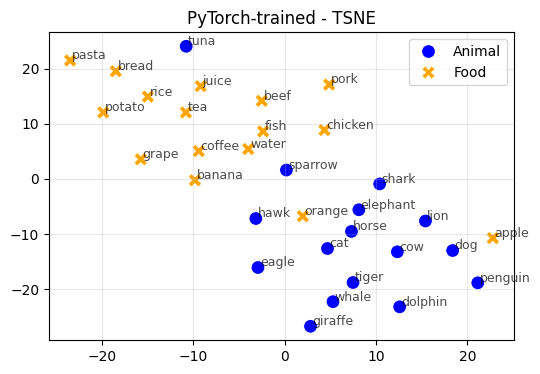

/Users/soyeonpark/Projects/courses/stat359/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/soyeonpark/Projects/courses/stat359/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


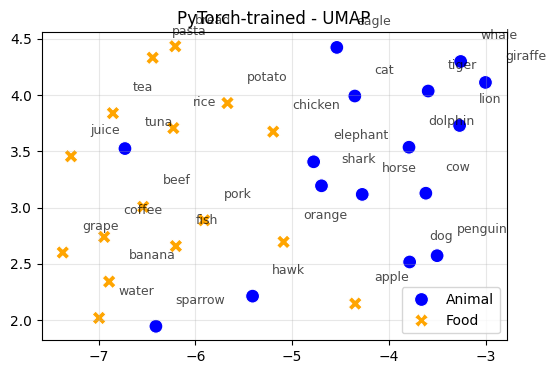

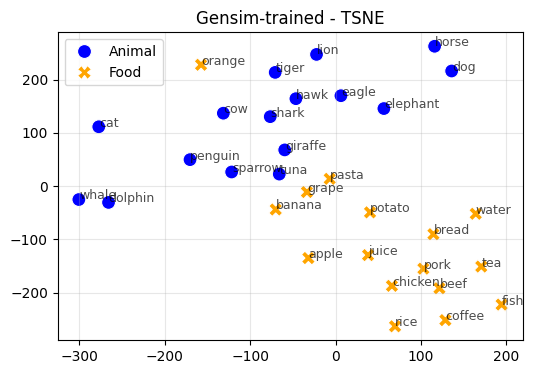

/Users/soyeonpark/Projects/courses/stat359/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/soyeonpark/Projects/courses/stat359/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


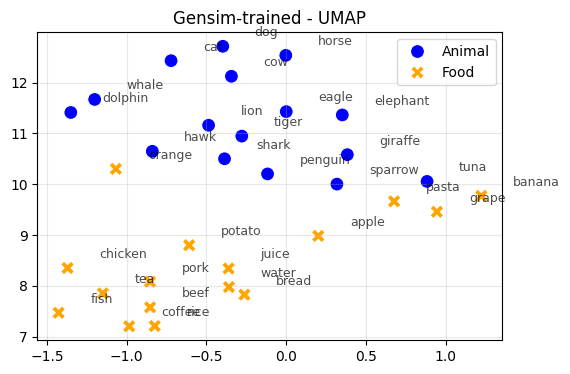

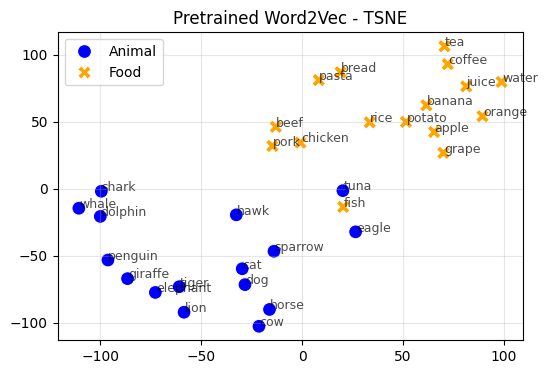

/Users/soyeonpark/Projects/courses/stat359/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/soyeonpark/Projects/courses/stat359/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


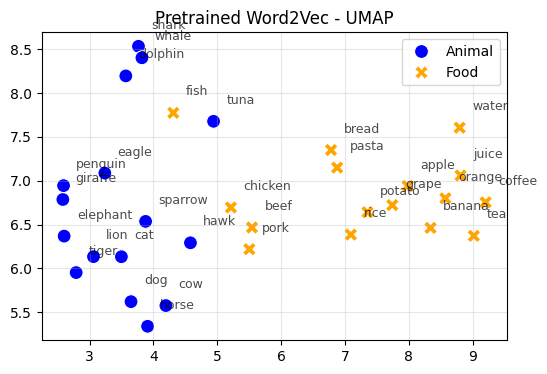

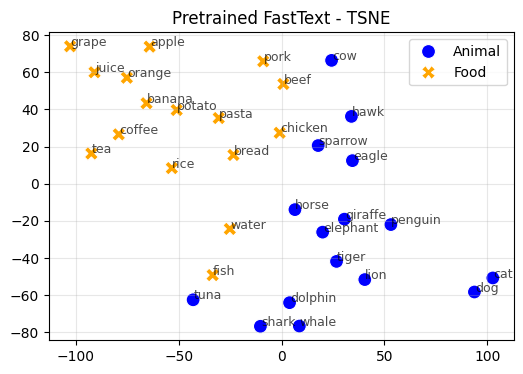

/Users/soyeonpark/Projects/courses/stat359/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/soyeonpark/Projects/courses/stat359/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


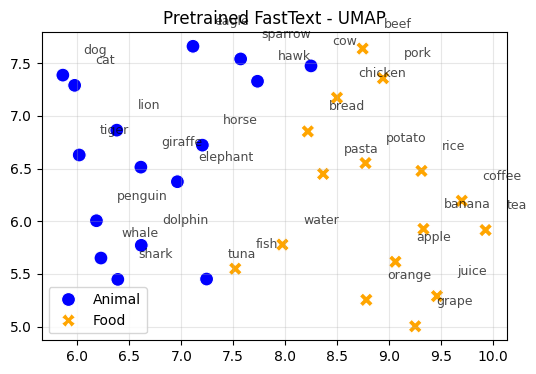

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import pandas as pd
import seaborn as sns

# 1. Words list
animals = [
    'dog', 'cat', 'horse', 'cow', 'lion', 'tiger', 'elephant', 'giraffe',
    'eagle', 'hawk', 'sparrow', 'penguin', 'shark', 'whale', 'dolphin', 'tuna'
]
foods = [
    'apple', 'orange', 'banana', 'grape', 'bread', 'pasta', 'rice', 'potato',
    'chicken', 'beef', 'pork', 'fish', 'coffee', 'tea', 'juice', 'water'
]

target_words = animals + foods
labels = ['Animal'] * len(animals) + ['Food'] * len(foods)

# 2. get vectors
def get_vectors(model, model_type, word_list):
    vectors = []
    valid_labels = []
    valid_words = []
    
    for word, label in zip(word_list, labels):
        vec = None
        if model_type == 'dict':
            embeddings, word2idx = model
            if word in word2idx:
                vec = embeddings[word2idx[word]]
        
        elif model_type == 'gensim':
            if word in model:
                vec = model[word]
            
        if vec is not None:
            vectors.append(vec)
            valid_labels.append(label)
            valid_words.append(word)     
            
    return np.array(vectors), valid_labels, valid_words

# 3. t-SNE & UMAP
def plot_embeddings(model_name, vectors, labels, method='TSNE'):
    if method == 'TSNE':
        reducer = TSNE(n_components=2, random_state=42, perplexity=min(5, len(vectors)-1), init='pca', learning_rate='auto')
    else:
        reducer = umap.UMAP(n_neighbors=min(5, len(vectors)-1), random_state=42)
        
    reduced_vecs = reducer.fit_transform(vectors)
    
    # Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=reduced_vecs[:, 0], y=reduced_vecs[:, 1], hue=labels, style=labels, s=100, palette={'Animal':'blue', 'Food':'orange'})
    
    # labeling
    for i, word in enumerate(plot_data['words']):
        plt.text(reduced_vecs[i, 0]+0.2, reduced_vecs[i, 1]+0.2, word, fontsize=9, alpha=0.7)
        
    plt.title(f"{model_name} - {method}")
    plt.grid(True, alpha=0.3)
    plt.show()

# 4. models
models_to_visualize = [
    ("PyTorch-trained", my_model_tuple, 'dict'),
    ("Gensim-trained", gensim_tuple, 'dict'),
    ("Pretrained Word2Vec", Word2Vec_model, 'gensim'),
    ("Pretrained FastText", fasttext_model, 'gensim')
]

# run
for name, model_obj, m_type in models_to_visualize:
    vecs, lbls, clean_words = get_vectors(model_obj, m_type, target_words)
    
    global plot_data 
    plot_data = {'words': clean_words}
    
    plot_embeddings(name, vecs, lbls, method='TSNE')
    plot_embeddings(name, vecs, lbls, method='UMAP')

# Part 7: Short Answer Questions

- Which embeddings performed best at capturing sentence meaning? 

    Pretrained FastText performed the best.

- Were the pretrained embeddings significantly better than your own? Why or why not?

    Yes. My PyTorch model failed to capture semantic similarity, ranking an unrelated sentence ("My shopping list includes milk and bread") as the top match. Maybe that's because it shared the word "My." In contrast, the pretrained models correctly identified "The feline was resting on the rug" as the best match, demonstrating a much deeper understanding of word relationships beyond simple co-occurrence.

- What factors might explain the differences in performance?

    The primary factors are Corpus Size and Vocabulary Coverage. Pretrained models were trained on billions of words, allowing them to learn robust relationships between synonyms like "cat" and "feline." Whereas our model was trained on a tiny dataset, which likely provided insufficient context to cover these rare words.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>
- **Tool(s) used:** ChatGPT 5.2
- **How you used them:** Mainly for Debugging and wording edits for written responses.
- **What you verified yourself:** Checked outputs


# 🎁 Bonus Exploration (optional)

In [ ]:
import numpy as np
from numpy.linalg import norm

def get_vector(model, model_type, word):
    if model_type == 'dict':
        embeddings, word2idx = model
        if word in word2idx:
            return embeddings[word2idx[word]]
    elif model_type == 'gensim':
        if word in model:
            return model[word]
    return None


def cosine(a, b, eps=1e-12):
    return float(np.dot(a, b) / (norm(a) * norm(b) + eps))

def odd_one_out(model_name, model, model_type, words):
    vectors = []
    oov = []

    # 1) OOV check
    for w in words:
        v = get_vector(model, model_type, w)
        if v is None:
            oov.append(w)
        else:
            vectors.append(np.asarray(v))

    if oov:
        return None, oov, None

    V = np.stack(vectors, axis=0)

    # 2) similarity
    sims = {}
    for i, w in enumerate(words):
        idx = [j for j in range(4) if j != i]
        centroid = V[idx].mean(axis=0)
        sims[w] = cosine(V[i], centroid)

    outlier = min(sims, key=sims.get)
    return outlier, [], sims


def run_odd_one_out(models):
    raw = input("Enter 4 words (comma-separated): ").strip()
    words = [w.strip().lower() for w in raw.split(",") if w.strip()]

    if len(words) != 4:
        print("Please enter exactly 4 words, e.g., cat, dog, tiger, banana")
        return

    print("\nYour words:", words)
    print("-" * 75)

    for name, model_obj, model_type in models:
        out, oov, sims = odd_one_out(name, model_obj, model_type, words)

        if oov:
            print(f"{name:20s}: NA   (OOV: {oov})")
        else:
            # confidence
            sorted_sims = sorted(sims.items(), key=lambda x: x[1])
            conf = sorted_sims[1][1] - sorted_sims[0][1]
            print(f"{name:20s}: {out}   (confidence: {conf:.4f})")



In [29]:
models = [
    ("PyTorch-trained", my_model_tuple, "dict"),
    ("Gensim-trained", gensim_tuple, "dict"),
    ("Pretrained Word2Vec", Word2Vec_model, "gensim"),
    ("Pretrained FastText", fasttext_model, "gensim"),
]

run_odd_one_out(models)



Your words: ['apple', 'car', 'orange', 'banana']
---------------------------------------------------------------------------
PyTorch-trained     : orange   (confidence: 0.0689)
Gensim-trained      : car   (confidence: 0.0615)
Pretrained Word2Vec : car   (confidence: 0.2674)
Pretrained FastText : car   (confidence: 0.1703)
